Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/binary_alpha_digits/1.0.0.incompleteOVRLSV/binary_alpha_digits-train.tfrecord


  0%|          | 0/1404 [00:00<?, ? examples/s]

Dataset binary_alpha_digits downloaded and prepared to /root/tensorflow_datasets/binary_alpha_digits/1.0.0. Subsequent calls will reuse this data.
Pixel in range: 0 - 1
Label: 16
Input shape: (20, 16, 1)
<ShuffleDataset element_spec=(TensorSpec(shape=(None, 20, 16, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<ShuffleDataset element_spec=(TensorSpec(shape=(None, 20, 16, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


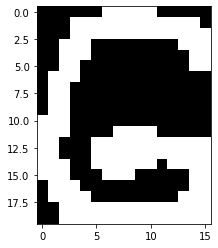

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

ds, ds_info = tfds.load("binary_alpha_digits", split="train",
                        as_supervised=True, shuffle_files=True,
                        with_info=True)
test_size = 0.2

ds_size = ds_info.splits["train"].num_examples
ds = ds.shuffle(buffer_size=ds_size)
num_train_samples = int(ds_size * (1 - test_size))

ds_train = ds.take(num_train_samples)
ds_test = ds.skip(num_train_samples)

for sample in ds_train.take(1):
  X_sample, y_sample = map(lambda x : x.numpy(), sample)

print("Pixel in range:", X_sample.min(), '-', X_sample.max())
print("Label:", y_sample)
plt.imshow(X_sample.squeeze(), cmap="gray");

num_classes = 10 + 26
input_shape = next(iter(ds_train))[0].shape
print("Input shape:", input_shape)

BATCH_SIZE = 128
ds_train = ds_train.batch(BATCH_SIZE).shuffle(num_train_samples)
ds_test = ds_test.batch(BATCH_SIZE).shuffle(ds_size - num_train_samples)

print(ds_train, ds_test, sep="\n")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, SpatialDropout2D, Dropout

In [4]:
model = Sequential()
 
model.add(Conv2D(32,(3,3),activation ='elu', input_shape = (20,16,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation ='elu'))
model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "elu"))
model.add(Dense(256, activation = "elu"))
model.add(Dropout(0.09))
model.add(Dense(num_classes, activation = "softmax"))
model.summary()
 
model.compile(optimizer = tf.keras.optimizers.Adam() , loss = "sparse_categorical_crossentropy", metrics=["acc"])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
hist = model.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[callback])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 5, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 2, 64)         0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                        

In [ ]:
model.save('binary_alpha_digits.h5')